<div style="display: flex; justify-content: center; align-items: center;">
<p align="center">
<img src="Capa_c.jpeg" style="width:250px;height:250px" alt='imagem do daniel'>
</p>

<div style="margin-left: 20px;">
<h1 style="font-family: times new roman;">DreamCoders</h1>
<p style="margin-bottom: 5px;">Trabalho Final de Redes Neurais</p>
<p style="margin-bottom: 5px;">INTEGRANTES: Eric Leandro e Samuel Araujo </p>
<p style="margin-bottom: 5px;">DISCIPLINA: Redes Neurais e Algoritmos Genéticos</p>
<p style="margin-bottom: 5px;">MESTRE: Daniel Cassar</p>

</div>

# Introdução

A Ciência de Materiais é uma área vasta que abrange uma grande quantidade de áreas da ciência, desde físico-química até as biociências, e mais recentemente, com o advento do progresso da ciência de dados, as possibilidades de exploração e pesquisa aumentaram em uma escala impressionante. A ciência de dados permitiu avanços mais rápidos na descoberta e caracterização de materiais, tornando-se uma parte fundamental no avanço da ciência de materiais, sendo comum a aplicação de redes neurais para previsão de características específicas.

Uma das características específicas dos materiais é a dureza, a qual consiste na capacidade de resistir à deformação plástica quando submetido a processos como indentação, abrasão ou penetração. Em outras palavras, é a habilidade do material de resistir à penetração ou ao risco por parte de um material mais duro.

Neste trabalho, será desenvolvido exploração e manipulação de dois datasets com informações sobre caracaterísticas de minerais com o intuito de treinar uma rede neural do tipo MLP para previsão da dureza desses materiais. A escala utilizada, na predição, é a escala de Mohs, essa escala é utilizada para minerais principalmente, indo de uma escala de 1 a 10, sendo que quanto maior o valor maior a dureza do material.

### Dados

Os dados extraídos consiste em dois databases de minerais, uma para treino com 622 minerais e outro para validação com 51 minerais. Ambos os dataset possuem um total de 11 descrições atômicas de cada mineral, ou seja, 11 features e a dureza como target.
*Features*
- Número de elétrons
- Número de elétrons de valência
- Número atômico
- Eletronegativa de Pauling
- Eletronegatividade do estado de oxidação mais comum
- Raios atômicos covalentes
- Raio de Vander Waals
- Energia de ionização do neutro
- Média de todos os elétrons
- Densidade média
- Peso atômico

Entretanto, o dataset de validação possui duas colunas a mais. A primeira corresponde a fórmula molecular do mineral e a segunda ao tipo de estrutura ceistalina.

#### Dataset de Treino
O Dataset de treino é composto por 622 minerais com composições únicas obtidos por permutações composicionais de uma base de dados com 369 minerais únicos retirados do *Physical and Optical Properties of Minerals CRC Handbook of Chemestry and Physics* e da *American Mineralogist Crystal Structure Database* . Os minerais presentes do dataset possuem estruturas critalinas diversas como já foi mencionado, sendo: 

- 210 de estrutura monoclínica;
- 96 de estrutura romboédrica;
- 89 de estrutura hexagonal;
- 80 de estrutura tetragonal;
- 73 de estrutura cúbica;
- 50 de estrutura ortorrômbica;
- 22 de estrutura triclínica;
- 1 de estrutura trigonal;
- 1 de estrutura amorfa.

#### Dataset de Validação
O dataset de validação é composto por 51 cristais sintéticos singulares retirados da literatura, sendo a distribuição das estruturas cristalinas:

- 15 de estrutura monoclínica;
- 7 de estrutura tetragonal;
- 7 de estrutura hexagonal;
- 6 de estrutura ortorrômbicas;
- 4 de estrutura cúbica;
- 3 de estrutura romboédrica.

# Código

A partir daqui, será dado início a manipulação dos datasets e o desenvolvimento da rede neural junto com a sua otimização e aplicação.

## Definições

Primeiro é necessário a importação das bibliotecas do python que serão utilizadas.

**Manipulação de dados**
- Numpy;
- Pandas.

**Rede Neural**
- Pytorch -> Incluindo "torch.nn" para criação da rede neural e "torch.optim" para optimização da rede.

**Métricas e Dimensionamento**
- Scikitlearn  -> Sendo "sklearn.metrics" para as métricas dos erros das previsões e "sklearn.preprocessing", em específico, "MinMaxScaler" para redimenssionamento.

**Visualização**
- Matplotlib -> "matplotlib.pyplot".

In [1]:
'''IMPORTS'''

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Abaixo, há a definição de algumas funções que serão utilizadas ao decorrer do notebook para o cálculo das métricas de erro(RMSE e R2) junto com a função para o plot do gráfico dos resíduos de erros

In [2]:
'''FUNÇÕES'''

def root_mean_squared_error(y_true, y_pred):
    """
    Calcula a raiz do erro quadrático médio (RMSE).

    Args:
        y_true (array-like): Os valores verdadeiros.
        y_pred (array-like): Os valores previstos.

    Returns:
        float: A raiz do erro quadrático médio.
    """
    return np.sqrt(mean_squared_error(y_true, y_pred))

def r_squared(y_true, y_pred):
    """
    Calcula o coeficiente de determinação (R²).

    Args:
        y_true (array-like): Os valores verdadeiros.
        y_pred (array-like): Os valores previstos.

    Returns:
        float: O coeficiente de determinação.
    """
    return r2_score(y_true, y_pred)

def plot_residuals(y_true, y_pred):
    """
    Plota o gráfico de resíduos.

    Args:
        y_true (array-like): Os valores verdadeiros.
        y_pred (array-like): Os valores previstos.
    """
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.title('Gráfico de Resíduos')
    plt.xlabel('Valores Previstos')
    plt.ylabel('Resíduos')
    plt.grid(True)
    plt.show()


## Manipulação dos Dados

### Leitura

In [3]:
'''Pegando os dados'''

# Carregando o arquivo CSV para o teste
minerais_treino = pd.read_csv('Mineral_Dataset_Supplementary_Info.csv')

# Transformando o dataset em um Dataframe pandas
df_treino = pd.DataFrame(minerais_treino) 

# Mostrando o Dataframe
print("Dataset de treino:")
display(df_treino)

# Carregando o arquivo CSV para o teste
minerais_teste = pd.read_csv('Artificial_Crystals_Dataset.csv')

# Transformando o dataset em um Dataframe pandas
df_teste = pd.DataFrame(minerais_teste) 

# Mostrando o Dataframe
print("Dataset de teste:")
display(df_teste)

Dataset de treino:


,Unnamed: 0,Hardness,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,0,2.3,110.0,23.000000,36.666667,2.666667,82.598467,8.504133,2.146667,2.006667,1.253333,0.456803,7.666667
1,1,5.5,406.0,30.472136,9.902439,4.682927,19.813180,11.456151,2.700244,1.676829,0.868293,0.522909,0.743223
2,2,5.5,406.0,30.472464,10.410256,4.923077,20.931371,11.541405,2.753590,1.703846,0.894359,0.497498,0.781345
3,3,5.5,476.0,61.142136,11.609756,4.682927,23.659644,11.487395,2.763659,1.714634,0.848780,0.519474,1.491272
4,4,5.5,476.0,61.142464,12.205128,4.923077,24.975089,11.574251,2.820256,1.743590,0.873846,0.493887,1.567755
...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,625,3.8,46.0,9.133000,23.000000,4.000000,48.719500,9.877100,2.115000,1.905000,1.120000,0.478880,4.566500
618,626,4.5,86.0,6.674328,14.333333,5.166667,30.645954,11.862733,2.861667,1.700000,0.901667,0.487172,1.112388
619,628,4.0,38.0,7.134332,19.000000,4.000000,40.689515,11.506150,2.545000,1.765000,0.920000,0.479405,3.567166
620,629,7.5,86.0,8.841328,14.333333,5.000000,30.550687,11.543000,2.831667,1.735000,0.890000,0.489507,1.473555


Dataset de teste:


,Unnamed: 0,Formula,Crystal structure,Hardness (Mohs),allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,0,MnTeMoO6,tetragonal,4.50,167.000,23.907992,18.555556,5.000000,41.609136,11.693844,2.938889,1.711111,0.884444,0.477830,2.656444
1,1,MgH2,tetragonal,4.00,14.000,1.740168,4.666667,1.333333,8.773227,11.614333,1.903333,1.310000,0.680000,0.825990,0.580056
2,2,CO(NH2)2C4H6O5,monoclinic,2.50,102.000,8.511159,4.434783,3.304348,8.440584,13.176622,2.672609,1.379130,0.530870,0.713850,0.370050
3,3,GaPO4,trigonal,5.50,78.000,8.109328,13.000000,5.333333,27.448814,11.826400,2.960000,1.625000,0.813333,0.488163,1.351555
4,4,Ga3PO7,trigonal,6.50,164.000,19.921324,14.909091,5.090909,32.012361,11.255573,2.881818,1.640909,0.841818,0.483480,1.811029
5,5,LiB3O5,orthorhombic,6.50,58.000,7.650660,6.444444,4.444444,13.261239,10.930689,2.700000,1.686667,0.780000,0.479962,0.850073
6,6,BiB3O6,monoclinic,5.75,146.000,16.864992,14.600000,5.000000,33.739258,11.388810,2.866000,1.695000,0.786000,0.478464,1.686499
7,7,K2Al2B2O7,trigonal,6.00,130.000,11.871324,10.000000,4.307692,20.443453,10.198131,2.540000,1.820000,0.972308,0.489274,0.913179
8,8,Nd0.02GdLa0.16Ca4O(BO3)3,monoclinic,6.42,249.320,22.345960,13.713971,4.365237,29.432344,10.598482,2.525787,1.813894,0.992739,0.487604,1.229151
9,9,Nd0.02GdLa0.33Ca4O(BO3)3,monoclinic,6.35,259.010,23.392140,14.114986,4.343324,30.446537,10.551961,2.512578,1.819602,1.001515,0.486888,1.274776


### Tratamento

In [4]:
'''Tratando os dados'''

# Retirando colunas desinteressantes
df_teste = df_teste.drop(['Unnamed: 0', 'Crystal structure', 'Formula'], axis=1)

# Trocando o nome de uma coluna para facilitar o codigo
df_teste.rename(columns={'Hardness (Mohs)': 'Hardness'}, inplace=True)

# Retirando valores nan
df_teste = df_teste.dropna()

# Ajustando o index
df_teste = df_teste.reset_index(drop=True)

df_teste # Mostrando nova tabela

,Hardness,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,4.50,167.000,23.907992,18.555556,5.000000,41.609136,11.693844,2.938889,1.711111,0.884444,0.477830,2.656444
1,4.00,14.000,1.740168,4.666667,1.333333,8.773227,11.614333,1.903333,1.310000,0.680000,0.825990,0.580056
2,2.50,102.000,8.511159,4.434783,3.304348,8.440584,13.176622,2.672609,1.379130,0.530870,0.713850,0.370050
3,5.50,78.000,8.109328,13.000000,5.333333,27.448814,11.826400,2.960000,1.625000,0.813333,0.488163,1.351555
4,6.50,164.000,19.921324,14.909091,5.090909,32.012361,11.255573,2.881818,1.640909,0.841818,0.483480,1.811029
5,6.50,58.000,7.650660,6.444444,4.444444,13.261239,10.930689,2.700000,1.686667,0.780000,0.479962,0.850073
6,5.75,146.000,16.864992,14.600000,5.000000,33.739258,11.388810,2.866000,1.695000,0.786000,0.478464,1.686499
7,6.00,130.000,11.871324,10.000000,4.307692,20.443453,10.198131,2.540000,1.820000,0.972308,0.489274,0.913179
8,6.42,249.320,22.345960,13.713971,4.365237,29.432344,10.598482,2.525787,1.813894,0.992739,0.487604,1.229151
9,6.35,259.010,23.392140,14.114986,4.343324,30.446537,10.551961,2.512578,1.819602,1.001515,0.486888,1.274776


### Segmentação dos dados

In [5]:
'''Separando Features e Targets'''

# Definindo Features
FEATURES = [ 'density_Total',  'allelectrons_Average',
            'val_e_Average',  'atomicweight_Average',  'ionenergy_Average',
            'el_neg_chi_Average',  'R_cov_element_Average',
             'density_Average']

# Definindo Targets
TARGET = 'Hardness'

# Separando dados para o treino
X_train = df_treino[FEATURES]
Y_train = df_treino[TARGET]

# Separando dados para teste
X_test = df_teste[FEATURES]
Y_test = df_teste[TARGET]

In [6]:
'''Normalizando os dados'''

# Criando um objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajuste o scaler aos dados e transforme-os
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Tensores

In [7]:
'''Transformando em tensores'''

# Tensores do treino
X_train_scaled_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)

# Tensores do teste
X_test_scaled_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32)

# Ajustando dimensões dos targets
Y_train_tensor_dimensionado = Y_train_tensor.view(-1,1)
Y_test_tensor_dimensionado = Y_test_tensor.view(-1,1)

## Rede Neural

### Montando a Rede

In [8]:
'''Redes Neural'''

class NeuralNetworkRegressor(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, learning_rate=0.1, dropout_prob=0.3, momentum=0.8):
        super(NeuralNetworkRegressor, self).__init__()
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.dropout_prob = dropout_prob
        self.momentum = momentum
        
        # Primeira camada oculta
        self.hidden_layer1 = nn.Linear(input_size, hidden_size1)
        self.hidden_activation1 = nn.ReLU()
        
        # Segunda camada oculta
        self.hidden_layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.hidden_activation2 = nn.ReLU()
        
        # Camada de saída
        self.output_layer = nn.Linear(hidden_size2, 1)
        
        # Dropout
        self.dropout = nn.Dropout(p=dropout_prob)
        
        # Otimizador com Momento
        self.optimizer = optim.SGD(self.parameters(), lr=learning_rate, momentum=momentum)
        
        # Função de perda (Mean Squared Error)
        self.criterion = nn.MSELoss()
    
    def forward(self, x):
        # Primeira camada oculta
        hidden_output1 = self.hidden_layer1(x)
        hidden_output1 = self.hidden_activation1(hidden_output1)
        
        # Dropout (apenas durante o treinamento)
        if self.training:
            hidden_output1 = self.dropout(hidden_output1)
        
        # Segunda camada oculta
        hidden_output2 = self.hidden_layer2(hidden_output1)
        hidden_output2 = self.hidden_activation2(hidden_output2)
        
        # Dropout (apenas durante o treinamento)
        if self.training:
            hidden_output2 = self.dropout(hidden_output2)
        
        # Camada de saída
        output = self.output_layer(hidden_output2)
        return output
    
    def train_model(self, X_train, y_train, epochs):
        for epoch in range(epochs):
            # Ativa o modo de treinamento
            self.train()
            
            # Realiza a propagação direta
            outputs = self(X_train)
            
            # Calcula a perda
            loss = self.criterion(outputs, y_train)
            
            # Retropropagação e atualização dos pesos
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            
            # Mostra a perda a cada 100 épocas
            if (epoch + 1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')
                
    def predict(self, X, num_samples=10, ):
        """
        Realiza a previsão com base nos dados de entrada fornecidos usando Monte Carlo Dropout.

        Args:
            X (torch.Tensor): Os dados de entrada para prever.
            num_samples (int): O número de amostras de dropout a serem usadas (default 10).

        Returns:
            torch.Tensor: A média das previsões feitas com diferentes amostras de dropout.
        """
        # Ativa o modo de avaliação
        self.eval()
        
        # Lista para armazenar as previsões
        self.predictions = []
        
        # Realiza múltiplas previsões com diferentes amostras de dropout
        for _ in range(num_samples):
            with torch.no_grad():
                outputs = self(X)
                self.predictions.append(outputs)
        
        # Calcula a média das previsões
        predictions_mean = torch.stack(self.predictions).mean(dim=0)
        return predictions_mean


### Treinando a rede

In [9]:
'''Treinando a rede'''

# Parâmetros da rede neural
input_size = 8
hidden_size1 = 32
hidden_size2 = 16
epochs = 2000
learning_rate = 0.01

# Criação e treinamento da rede neural
neural_net = NeuralNetworkRegressor(input_size, hidden_size1, hidden_size2, learning_rate)
neural_net.train_model(X_test_scaled_tensor, Y_test_tensor_dimensionado, epochs)

Epoch [100/2000], Loss: 2.5050859451293945
Epoch [200/2000], Loss: 1.7308433055877686
Epoch [300/2000], Loss: 1.7020514011383057
Epoch [400/2000], Loss: 1.681427001953125
Epoch [500/2000], Loss: 1.728271484375
Epoch [600/2000], Loss: 1.3495045900344849
Epoch [700/2000], Loss: 1.5298529863357544
Epoch [800/2000], Loss: 1.5520609617233276
Epoch [900/2000], Loss: 1.2049483060836792
Epoch [1000/2000], Loss: 1.1198896169662476
Epoch [1100/2000], Loss: 1.300291895866394
Epoch [1200/2000], Loss: 1.2498430013656616
Epoch [1300/2000], Loss: 1.2304072380065918
Epoch [1400/2000], Loss: 1.1318295001983643
Epoch [1500/2000], Loss: 1.093766212463379
Epoch [1600/2000], Loss: 1.0480108261108398
Epoch [1700/2000], Loss: 1.512373685836792
Epoch [1800/2000], Loss: 1.21371328830719
Epoch [1900/2000], Loss: 1.3180196285247803
Epoch [2000/2000], Loss: 1.0323126316070557


### Aplicando a rede

In [10]:
'''Testando a rede'''

predictions = neural_net.predict(X_test_scaled_tensor)
print("Predictions:")
print(predictions)


Predictions:
tensor([[5.0968],
        [4.1428],
        [3.5594],
        [6.0341],
        [6.3717],
        [6.4977],
        [6.0331],
        [6.2211],
        [5.3838],
        [5.2565],
        [5.7362],
        [5.1792],
        [5.9306],
        [5.6087],
        [6.6525],
        [3.3992],
        [4.0880],
        [5.1818],
        [5.1634],
        [6.4978],
        [5.2536],
        [5.7885],
        [4.9604],
        [5.2498],
        [4.8436],
        [6.6525],
        [6.6525],
        [6.0827],
        [6.2719],
        [5.2129],
        [5.1762],
        [6.6512],
        [5.0199],
        [4.0880],
        [6.4491],
        [5.5136],
        [6.6525],
        [6.3516],
        [5.1814],
        [6.3085],
        [5.1999],
        [5.8634],
        [6.6525],
        [6.5474],
        [4.2803],
        [4.0679],
        [4.0325],
        [6.0144],
        [5.3278],
        [4.0993],
        [4.1651],
        [4.0256]])


### Cálculo dos erros

MSE: 0.848930299282074
MAE: 0.7267087697982788
RMSE: 0.9213741421699524
R²: 0.6270432856372725


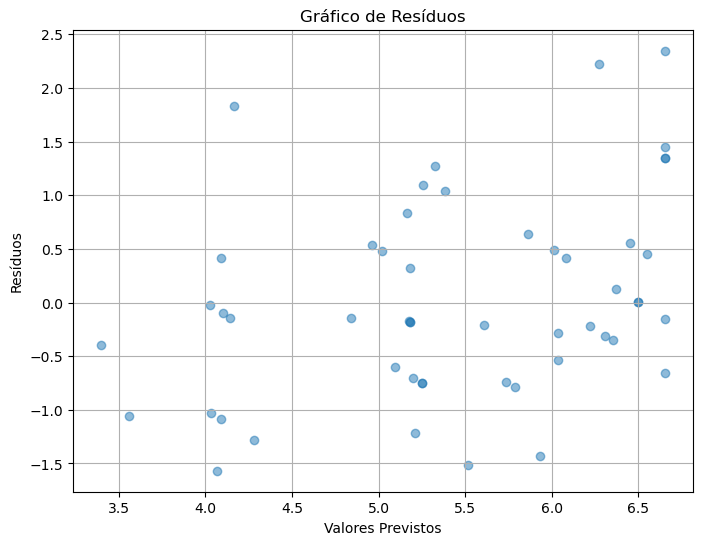

In [11]:
'''Calculando erros'''

# Calculando as métricas
mse = mean_squared_error(Y_test_tensor_dimensionado, predictions)
mae = mean_absolute_error(Y_test_tensor_dimensionado, predictions)
rmse = root_mean_squared_error(Y_test_tensor_dimensionado, predictions)
r2 = r_squared(Y_test_tensor_dimensionado, predictions)

# Exibindo os resultados
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')


# Plotando o gráfico de resíduos
plot_residuals(Y_test_tensor_dimensionado, predictions)



# Conclusão

A partir dos resultados da dureza dos minerais preditos pela rede neural, 